<a href="https://colab.research.google.com/github/mikhailchahin/-Bank-marketing-Ve/blob/main/Bank_marketing_Ve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

## Carga y descripción del dataset

Se carga el dataset y se realiza una primera inspección para conocer su estructura,
cantidad de registros y tipos de variables disponibles.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bank marketing Venezuela.xlsx to Bank marketing Venezuela (4).xlsx


In [ ]:
# 2 leer el archivo existente (con el nombre exacto)
archivo = "Bank marketing Venezuela.xlsx"
df =pd.read_excel(archivo)

In [ ]:
# 2 leer el archivo existente (con el nombre exacto)
archivo = "Bank marketing Venezuela.xlsx"
df =pd.read_excel(archivo)

## Introducción

El presente trabajo tiene como objetivo analizar un conjunto de datos relacionado con campañas de marketing telefónico,
con el fin de comprender qué factores influyen en la aceptación de un depósito por parte de los clientes.
A partir de este análisis exploratorio, se busca sentar las bases para un futuro modelo de clasificación.

## Limpieza y preparación de datos

Antes de realizar el análisis exploratorio, se revisa la presencia de valores nulos
y se evalúa la necesidad de transformar o limpiar variables para asegurar la calidad de los datos.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [ ]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


##EXPLORARCION DEL EDA

Análisis exploratorio de datos

Valor de negocio

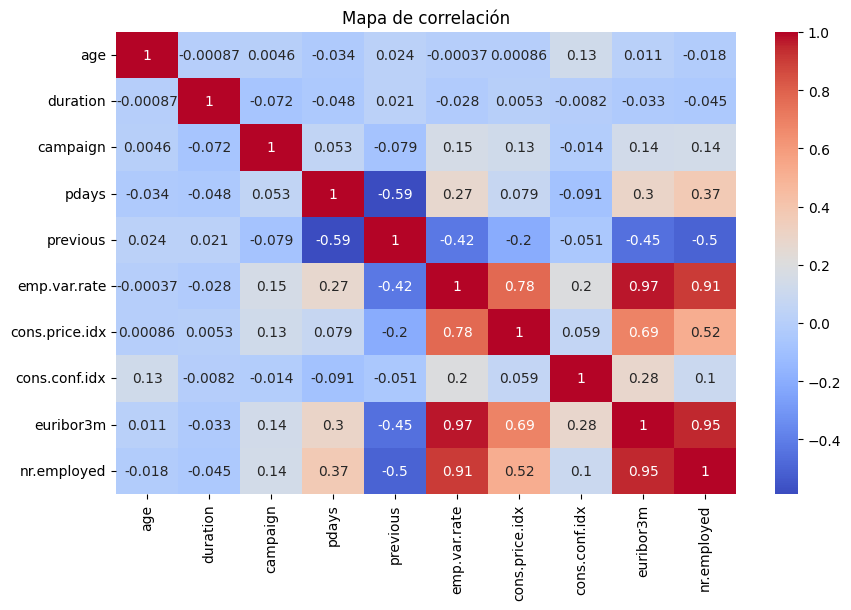

In [ ]:
# Mapa de correlacion

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True,cmap="coolwarm")
plt.title('Mapa de correlación')
plt.show()



### Análisis univariado

Se analizan las distribuciones de las variables numéricas para identificar patrones,
asimetrías y posibles valores atípicos.

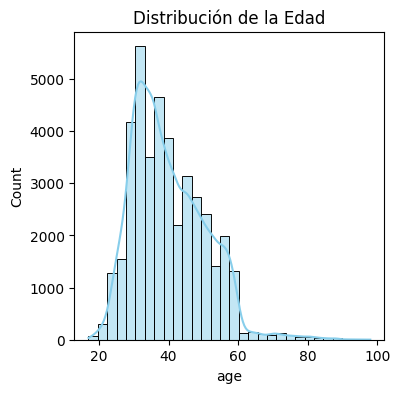

In [ ]:
# Gráfica 1: Edad

# configuro el tamaño del grafico
plt.figure(figsize=(4, 4))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de la Edad')
plt.show()

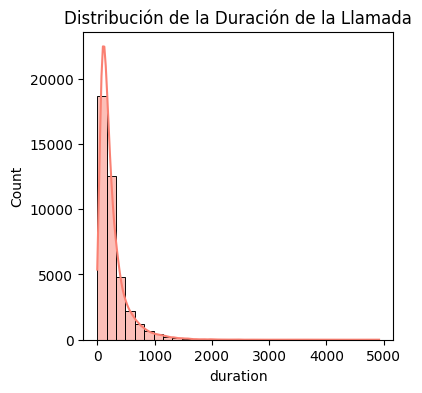

In [ ]:
# Duración
# configuro el tamaño del grafico
plt.figure(figsize=(4, 4))
sns.histplot(df['duration'], bins=30, kde=True, color='salmon')
plt.title('Distribución de la Duración de la Llamada')
plt.show()

### Análisis bivariado

Se explora la relación entre distintas variables explicativas y la variable objetivo,
con el fin de identificar posibles factores predictivos.


Se observa que las llamadas con mayor duración presentan una mayor tasa de aceptación,
lo que sugiere que esta variable podría ser un fuerte predictor.


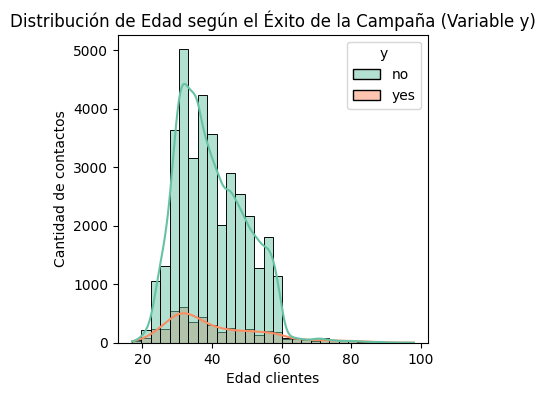

In [ ]:
# configuro el tamaño del grafico
plt.figure(figsize=(4, 4))

#histograma comparativo
sns.histplot(data=df, x="age",hue="y",bins=30,kde=True,palette="Set2")
#agrego titulos
plt.title("Distribución de Edad según el Éxito de la Campaña (Variable y)")
plt.xlabel("Edad clientes")
plt.ylabel("Cantidad de contactos")
plt.show()



***A más tiempo de llamada, más éxito?***

### Variable objetivo

La variable `y` indica si el cliente aceptó (`yes`) o no (`no`) el depósito ofrecido,
y será utilizada como variable objetivo en futuros modelos de clasificación.


/tmp/ipython-input-1454996935.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="y",y="duration",palette="Set2")


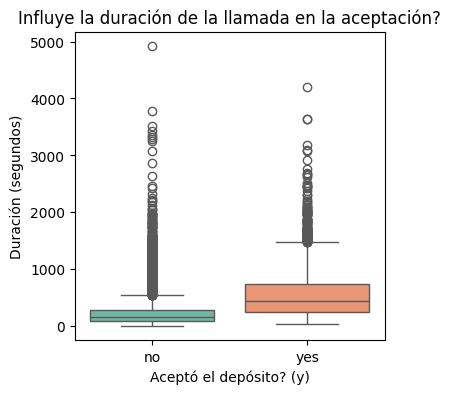

In [ ]:
plt.figure(figsize=(4, 4))
sns.boxplot(data=df, x="y",y="duration",palette="Set2")
plt.title('Influye la duración de la llamada en la aceptación?')
plt.xlabel('Aceptó el depósito? (y)')
plt.ylabel('Duración (segundos)')
plt.show()

## Principales hallazgos

- La duración de la llamada muestra una fuerte relación con la aceptación del depósito.
- La mayoría de los clientes se concentran en un rango etario específico.
- Existen variables con distribuciones sesgadas que podrían requerir transformación.



--------------

## Análisis de Variables Categóricas y Tasa de Conversión

Calcula la tasa de éxito: Determina la proporción de respuestas positivas (yes) frente a las negativas por cada categoría.

Los segmentos de 'estudiantes' y 'jubilados' muestran una tasa de conversión superior al promedio, a pesar de no ser el grupo más contactado. Esto sugiere una oportunidad de optimización de presupuest

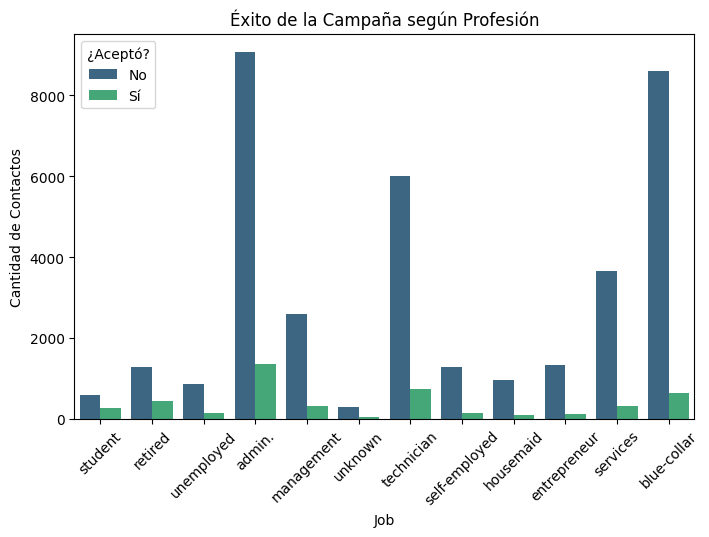

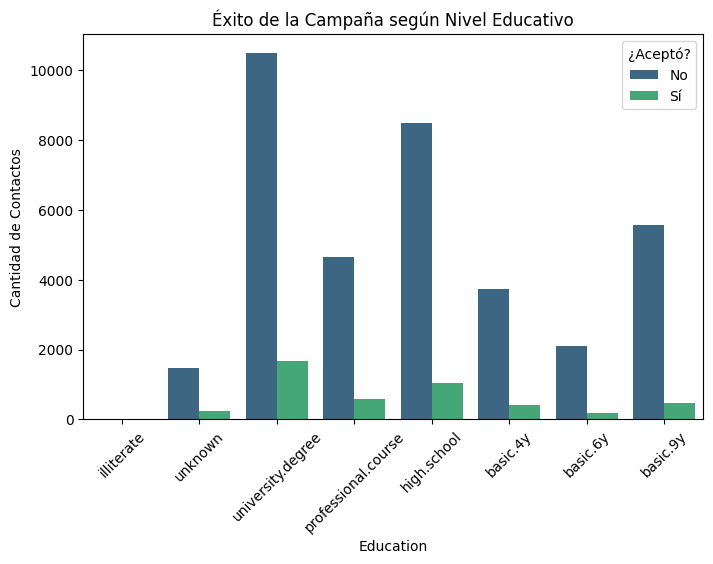

In [ ]:
# 1. Definimos una función para graficar la tasa de éxito por categoría
def plot_conversion_rate(df, column, title):
    plt.figure(figsize=(8, 5))

    # Calculamos el porcentaje de "yes" por cada categoría
    order = df.groupby(column)["y"].value_counts(normalize=True).unstack()['yes'].sort_values(ascending=False).index

    sns.countplot(data=df, x=column, hue='y', order=order, palette='viridis')

    plt.title(title)
    plt.xticks(rotation=45)
    plt.xlabel(column.capitalize())
    plt.ylabel('Cantidad de Contactos')
    plt.legend(title='¿Aceptó?', labels=['No', 'Sí'])
    plt.show()

# 2. Ejecutamos el análisis para 'job' (Profesión)
plot_conversion_rate(df, 'job', 'Éxito de la Campaña según Profesión')

# 3. Ejecutamos el análisis para 'education' (Educación)
plot_conversion_rate(df, 'education', 'Éxito de la Campaña según Nivel Educativo')

##  Conclusiones y Recomendaciones de Negocio

Mediante el análisis exhaustivo del dataset de marketing, se extraen las siguientes conclusiones clave para optimizar futuras campañas:

1. **El factor tiempo es muy importante:** Hay una correlación positiva clara entre la duración de la llamada y la conversión.
   **Acción:* Implementar scripts de llamada que fomenten la retención del cliente durante los primeros 120 segundos.
2. **por perfil:** Los grupos de **estudiantes** y **jubilados** presentan las tasas de aceptación más altas.

3. **Nivel Educativo:** Los clientes con educación secundaria y terciaria responden mejor.